In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
## import pyclustertend 
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

Análisis de los datos

In [42]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

In [43]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

Kurtosis: 6.536282
Asimetría: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [44]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Prueba de Kolmogorov-Smirnov:
p=0.000000

Prueba de Lilliefors:
ks=0.123685
p=0.001000


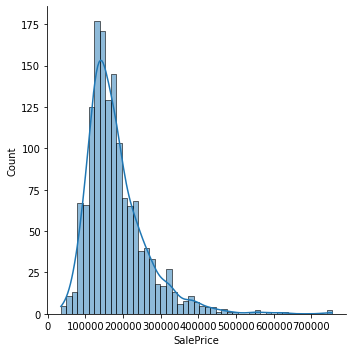

In [45]:
sns.displot(data['SalePrice'], kde=True)

In [46]:
data.fillna(0)
minPrice = data['SalePrice'].min()
maxPrice = data['SalePrice'].max()
divs = (maxPrice - minPrice) / 3
data['priceRange'] = data['LotArea']

data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
data['priceRange'][data['SalePrice'] >= minPrice + divs * 2] = 2.0 #Caro

C:\Users\juanp\AppData\Local\Temp\ipykernel_1852\618828850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
C:\Users\juanp\AppData\Local\Temp\ipykernel_1852\618828850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
C:\Users\juanp\AppData\Local\Temp\ipykernel_1852\618828850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [47]:
Y = data['priceRange']
X = data.drop(['priceRange'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

In [48]:
Xtrain = X_train.apply(pd.to_numeric, errors='coerce')
yTrain = y_train.apply(pd.to_numeric, errors='coerce')
Xtrain.fillna(0, inplace=True)
yTrain.fillna(0, inplace=True)
xtest = X_test.apply(pd.to_numeric, errors='coerce')
xtest.fillna(0, inplace=True)


In [52]:
scaler = StandardScaler()
scaler.fit(X)
Xtrain = scaler.transform(Xtrain)
xtest = scaler.transform(xtest)
print(Xtrain[:3])

ValueError: could not convert string to float: 'RL'

Modelo de redes neuronales

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
y_pred

ValueError: could not convert string to float: 'RL'

In [ ]:
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar virginica\n',cm)
print('Accuracy: ',accuracy)